Liner Regression homework
database: https://www.kaggle.com/hellbuoy/car-price-prediction

In [71]:
import pandas as pd
import seaborn as sns

In [136]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [138]:
df.drop(['car_ID', 'CarName','carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   enginelocation    205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginesize        205 non-null    int64  
 11  boreratio         205 non-null    float64
 12  stroke            205 non-null    float64
 13  compressionratio  205 non-null    float64
 14  horsepower        205 non-null    int64  
 15  peakrpm           205 non-null    int64  
 16  citympg           205 non-null    int64  
 1

<Axes: >

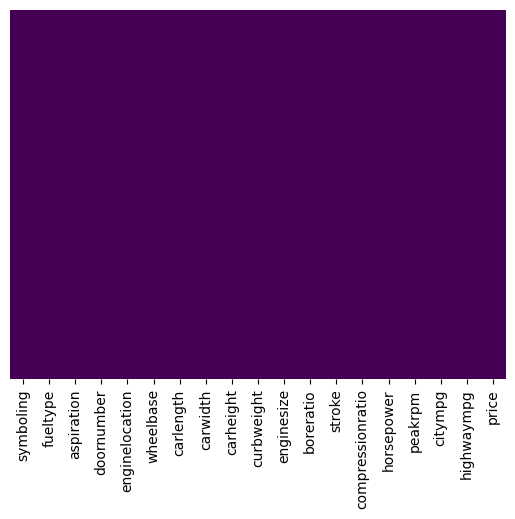

In [139]:
# check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='price', ylabel='Count'>

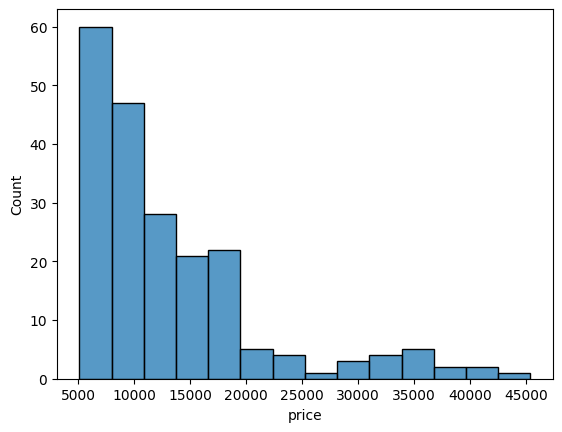

In [140]:
sns.histplot(df['price'])

In [141]:
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [142]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [143]:
# change object values to numerical values

df['fueltype_num'] = df['fueltype'].apply(lambda x: 1 if x=='gas' else 0)
df['aspiration_num'] = df['aspiration'].apply(lambda x: 1 if x=='std' else 0)
df['doornumber_num'] = df['doornumber'].apply(lambda x: 2 if x=='two' else 4)
df['enginelocation_num'] = df['enginelocation'].apply(lambda x: 1 if x=='front' else 0)



df.drop(['fueltype', 'aspiration','doornumber','enginelocation'],axis=1,inplace=True)
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_num,aspiration_num,doornumber_num,enginelocation_num
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,2,1
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,2,1
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,2,1
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,1,4,1
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1,4,1


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [145]:
X = df.drop(['price','symboling'],axis=1)
y = df['price']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
# normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)

LinearRegression()

In [151]:
predictions = linear_model.predict(X_test_scaled)

In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [153]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Mean Squared Error: 10618311.99570626
R-squared: 0.7460105332663675
Coefficients: [  549.61001322  -172.63364281  1616.17113635   360.80299637
  1738.65168668  5097.74471218 -1090.94241495  -913.80448766
  -472.15396997    41.17797067   746.43221678 -1364.4190306
  1472.49813367  -666.87989211  -590.19228576  -429.96569902
 -1831.48218746]
Intercept: 13378.369920731704


Check coefficients

In [154]:
coefficients = linear_model.coef_
feature_names = X.columns

In [155]:
# Create a DataFrame to hold the feature names and their corresponding coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': abs(coefficients)
})

In [156]:
# Sort the DataFrame by the absolute value of the coefficients
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted DataFrame
print(importance_df)

               Feature  Coefficient  Absolute Coefficient
5           enginesize  5097.744712           5097.744712
16  enginelocation_num -1831.482187           1831.482187
4           curbweight  1738.651687           1738.651687
2             carwidth  1616.171136           1616.171136
12          highwaympg  1472.498134           1472.498134
11             citympg -1364.419031           1364.419031
6            boreratio -1090.942415           1090.942415
7               stroke  -913.804488            913.804488
10             peakrpm   746.432217            746.432217
13        fueltype_num  -666.879892            666.879892
14      aspiration_num  -590.192286            590.192286
0            wheelbase   549.610013            549.610013
8     compressionratio  -472.153970            472.153970
15      doornumber_num  -429.965699            429.965699
3            carheight   360.802996            360.802996
1            carlength  -172.633643            172.633643
9           ho

In [163]:
X = df.drop(['price','symboling','enginelocation_num', 'citympg', 'boreratio', 'stroke','fueltype_num',
             'aspiration_num','compressionratio','doornumber_num'],axis=1)
y = df['price']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [166]:
predictions = linear_model.predict(X_test)

In [167]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Mean Squared Error: 13595884.57304235
R-squared: 0.8277781594914209
Coefficients: [-32.26003027 -38.25013827 679.39135942 238.48924748   2.91676458
  97.92660249  33.02885718   1.89402291 -10.74096261]
Intercept: -67237.97834378644
